In [13]:
import sys
sys.path.append("../")

import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
rcParams['figure.figsize'] = (6, 4)
rcParams['figure.dpi'] = 150

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import arff
from tqdm import tnrange, tqdm_notebook

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [26]:
data = arff.load(open('../data/elecNormNew.arff'))
cnames = [i[0] for i in data['attributes']]
df = pd.DataFrame(data['data'], columns=cnames)
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
X = df.iloc[:,1:-1]
y = df['class']

In [24]:
def sliding_prequential(n_init_tr, model, X, y, w):
    pred_match=[]
    accuracy = []
    y_pred = []
    
    row_n = y.shape[0]

    for i in tnrange(row_n - n_init_tr):
        Xn = X.iloc[:n_init_tr+i,:]
        yn = y.iloc[:n_init_tr+i]
        if w>(n_init_tr+i):
            model.fit(Xn, yn)
            y_new = model.predict(X.iloc[n_init_tr+i,:].values.reshape(1,-1))
            pred_match.append(y_new == y.iloc[n_init_tr+i])
        else:
            model.fit(Xn.iloc[-w:,:], yn.iloc[-w:])
            y_new = model.predict(X.iloc[n_init_tr+i,:].values.reshape(1,-1))
            pred_match.append(y_new == y.iloc[n_init_tr+i])
        accuracy.append(sum(pred_match)/len(pred_match))
    print('Average accuracy:', sum(accuracy)/len(accuracy))
    plt.plot(accuracy,'-')

In [5]:
nb = GaussianNB()
lr = LogisticRegression(solver='sag')
svm = SVC(kernel='rbf', C=100, gamma=1)
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=5)
forest = RandomForestClassifier(n_estimators=50)
gbc = GradientBoostingClassifier(n_estimators=50)
xgb = XGBClassifier()

In [6]:
models = [nb]

Average accuracy: [0.78816624]


None

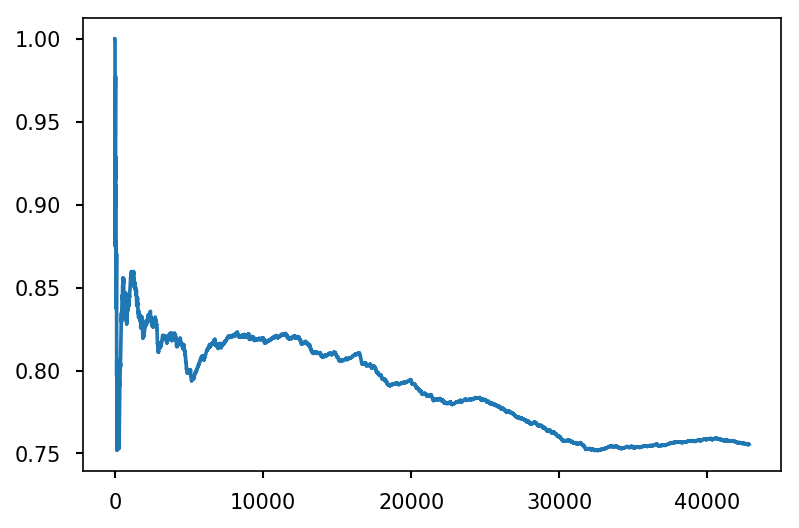

In [28]:
for model in models:
    display(sliding_prequential(2500, model, X, y, 5000))

In [23]:
from prequential import prequential

prequential(X, y, nb, n_train=2000)

TypeError: '(0, slice(None, None, None))' is an invalid key